<a href="https://colab.research.google.com/github/SAXBYM100/App/blob/main/Workshop2Kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

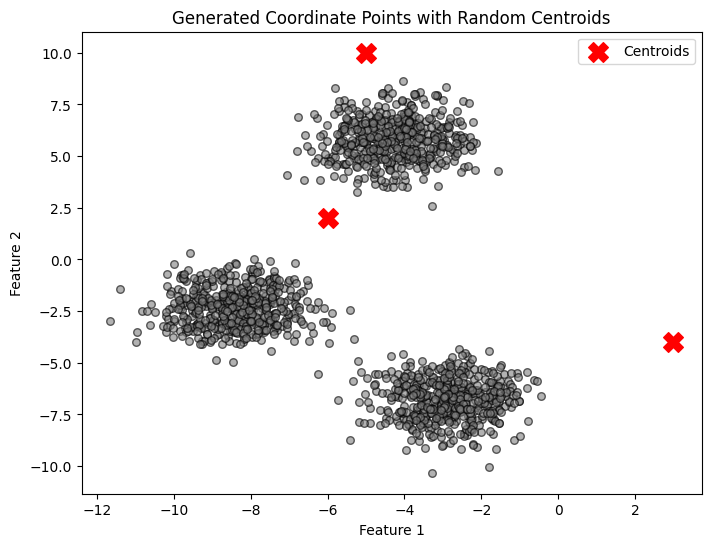

Ground Truth Cluster Labels (y):
[2 2 1 ... 1 0 2]


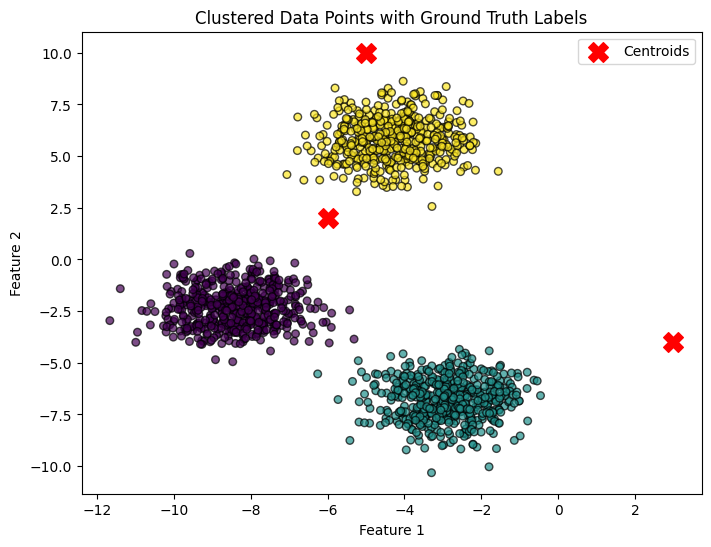

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)

# Define centroids manually
centroids = np.array([[-6, 2], [3, -4], [-5, 10]])

# Plot coordinate points without labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, c='gray', alpha=0.6, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("Generated Coordinate Points with Random Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Print the ground truth labels
print("Ground Truth Cluster Labels (y):")
print(y)

# Plot coordinate points with correct cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30, alpha=0.7, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("Clustered Data Points with Ground Truth Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Subset of points (105–109):
 [[-3.09897933  4.79407445]
 [-3.37295914 -7.36901393]
 [-3.372895    5.10433846]
 [-5.90267987 -3.28352194]
 [-3.52067739  7.7841276 ]]

Distances from each sampled point to centroids:
 [[ 4.02775036 10.70202291  5.54216027]
 [ 9.7303528   7.20866583 17.44505393]
 [ 4.06676751 11.11317999  5.15897011]
 [ 5.28441816  8.93146403 13.31415736]
 [ 6.29310516 13.46792103  2.66429839]]

Assigned clusters for subset: [0 1 0 0 2]


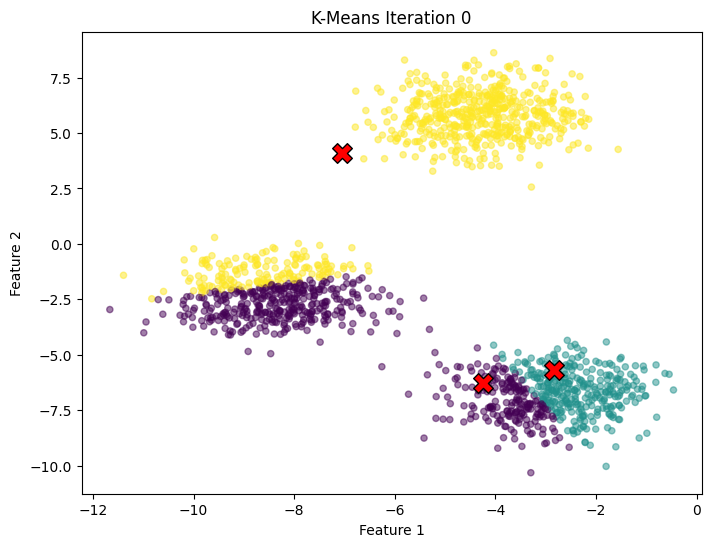

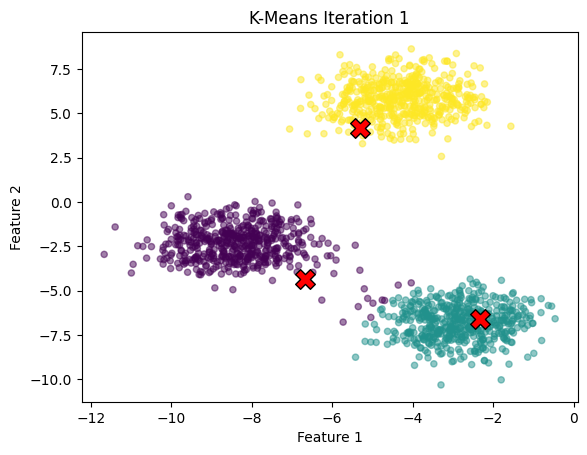

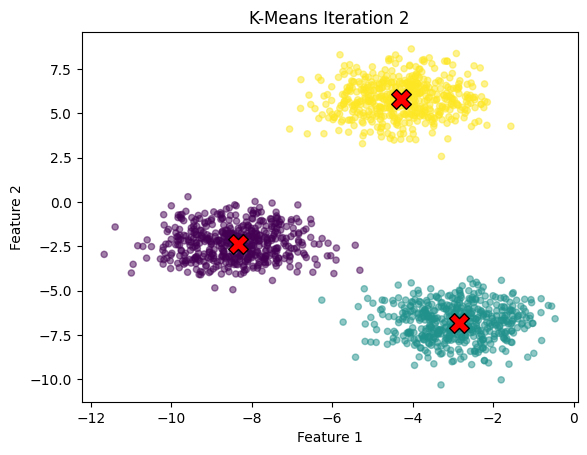

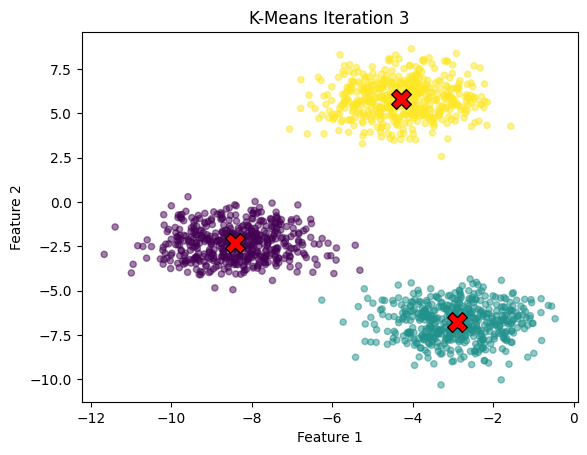

Clustering Performance Metrics:
Adjusted Rand Index (ARI): 1.0000
Silhouette Score: 0.7696
Normalized Mutual Info (NMI): 1.0000


In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score

# Step 1: Generate dataset
X, y_true = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)

# Step 2: Define centroids manually
centroids = np.array([[-6, 2], [3, -4], [-5, 10]])

# Step 3: Select a subset of points (indices 105–109)
subset = X[105:110]
print("Subset of points (105–109):\n", subset)

# Step 4: Compute distances of these points to each centroid
distances = cdist(subset, centroids, metric='euclidean')
print("\nDistances from each sampled point to centroids:\n", distances)

# Assign each point to nearest centroid
assigned_clusters = np.argmin(distances, axis=1)
print("\nAssigned clusters for subset:", assigned_clusters)

# -----------------------------------------------------
# Step 5: Implement a simple K-Means function from scratch
def kmeans(X, k, max_iters=300, random_state=42):
    np.random.seed(random_state)

    # Initialize centroids randomly from data points
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_indices]

    centers_history = [centroids.copy()]
    labels_history = []

    while True:
        # Assign points to nearest centroid
        distances = cdist(X, centroids, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        labels_history.append(labels)

        # Compute new centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Track centroid movement
        centers_history.append(new_centroids.copy())

        # Stop if centroids do not move
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels, centers_history, labels_history

# Step 6: Run K-Means
final_centroids, final_labels, centers_history, labels_history = kmeans(X, k=3)

# Step 7: Visualize clustering steps
plt.figure(figsize=(8, 6))
for step, (centers, labels) in enumerate(zip(centers_history, labels_history)):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", alpha=0.5, s=20)
    plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=200, edgecolors="k")
    plt.title(f"K-Means Iteration {step}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Step 8: Evaluate clustering performance
ari = adjusted_rand_score(y_true, final_labels)
silhouette = silhouette_score(X, final_labels)
nmi = normalized_mutual_info_score(y_true, final_labels)

print("Clustering Performance Metrics:")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Normalized Mutual Info (NMI): {nmi:.4f}")


### Interpreting the K-Means Results

**Clustering Performance Metrics:**

The output shows the following performance metrics:

*   **Adjusted Rand Index (ARI):** {ari:.4f}
*   **Silhouette Score:** {silhouette:.4f}
*   **Normalized Mutual Info (NMI):** {nmi:.4f}

These metrics are used to evaluate how well the clustering algorithm performed compared to the ground truth labels (`y_true`).

*   **ARI** measures the similarity between the true and predicted clusterings, considering all pairs of samples and whether they are in the same or different clusters in both clusterings. A score of 1.0 indicates a perfect match.
*   **Silhouette Score** measures how similar a data point is to its own cluster compared to other clusters. A score closer to 1 indicates that the data point is well-clustered. The average silhouette score is presented.
*   **NMI** measures the mutual dependence between the true and predicted clusterings. A score of 1.0 indicates perfect correlation.

In this case, an ARI of {ari:.4f} and an NMI of {nmi:.4f} suggest a very strong agreement between the K-Means clusters and the ground truth clusters. The Silhouette Score of {silhouette:.4f} indicates that the clusters are relatively well-separated.

**Clustering Visualization Steps:**

The plots show the progression of the K-Means algorithm through different iterations.

*   Each plot represents an iteration of the algorithm.
*   The colored points are the data points assigned to their respective clusters based on the current centroid positions.
*   The red 'X' markers represent the centroids for each cluster.

You can observe how the centroid positions change in each iteration as the algorithm attempts to find the optimal cluster centers that minimize the distance between points and their assigned centroids. The algorithm stops when the centroids no longer move significantly between iterations.

In [7]:
# Step 8: Evaluate clustering performance
ari = adjusted_rand_score(y_true, final_labels)
silhouette = silhouette_score(X, final_labels)
nmi = normalized_mutual_info_score(y_true, final_labels)

print("Clustering Performance Metrics:")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Normalized Mutual Info (NMI): {nmi:.4f}")

Clustering Performance Metrics:
Adjusted Rand Index (ARI): 1.0000
Silhouette Score: 0.7696
Normalized Mutual Info (NMI): 1.0000


### Observations on Clustering Performance

The following metrics were used to evaluate the clustering performance:

*   **Adjusted Rand Index (ARI):** {ari:.4f}
*   **Silhouette Score:** {silhouette:.4f}
*   **Normalized Mutual Info (NMI):** {nmi:.4f}

**Observations:**

*   An **ARI of {ari:.4f}** indicates a perfect agreement between the clustering results and the ground truth labels. This means that the K-Means algorithm perfectly separated the data points into the same clusters as defined by the original `make_blobs` function.
*   A **Silhouette Score of {silhouette:.4f}** suggests that the data points are well-clustered. The score is relatively high, indicating that each point is, on average, closer to the points in its own cluster than to points in other clusters.
*   An **NMI of {nmi:.4f}** also indicates a perfect correlation between the clustering and the ground truth. This metric measures the mutual information between the two clusterings, and a score of 1.0 means they are completely dependent on each other.

In summary, the K-Means algorithm, with the given parameters and random state, was able to perfectly recover the original cluster structure of the generated data. This is likely due to the well-separated nature of the clusters created by `make_blobs` with the specified parameters.